# Flight Ticket Price

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we are provided prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing train Dataset
df_train=pd.read_csv('Flight_ticket_price_train.csv')

In [3]:
#Checking train Dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Importing test Dataset
df_test=pd.read_csv('Flight_ticket_price_test.csv')

In [5]:
#Checking test Dataset
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


These are our datasets on which we would do different operations.

In [6]:
#Droping unnecessary columns
df_train=df_train.drop(['Date_of_Journey','Source','Destination','Dep_Time','Arrival_Time','Additional_Info'],axis=1)

We dropped all unnecessary columns from the dataframe. Let's check the features present in our data.

In [7]:
#Checking Shape of train Dataframe
df_train.shape

(10683, 5)

We have 4 independent variables and 1 target variable. Next, let's look at how many categorical and numerical variables are there in our dataset.

In [8]:
#Checking Datatypes of columns of Dataframe
df_train.dtypes

Airline        object
Route          object
Duration       object
Total_Stops    object
Price           int64
dtype: object

In [9]:
#Checking train Dataset
df_train.head()

,Airline,Route,Duration,Total_Stops,Price
0,IndiGo,BLR ? DEL,2h 50m,non-stop,3897
1,Air India,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,7662
2,Jet Airways,DEL ? LKO ? BOM ? COK,19h,2 stops,13882
3,IndiGo,CCU ? NAG ? BLR,5h 25m,1 stop,6218
4,IndiGo,BLR ? NAG ? DEL,4h 45m,1 stop,13302


In [10]:
#Checking Nullvalues in the Dataframe
df_train.isnull().sum()

Airline        0
Route          1
Duration       0
Total_Stops    1
Price          0
dtype: int64

There are some null values present in some columns in the dataframe.

In [11]:
#Dropping of null value
df_train=df_train.dropna()

In [12]:
#Checking Nullvalues in the Dataframe
df_train.isnull().sum()

Airline        0
Route          0
Duration       0
Total_Stops    0
Price          0
dtype: int64

We can notice that all null values are removed. Now we will Check total counts of different values in some columns of the dataframe:

In [13]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df_train['Route'].value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
CCU ? RPR ? HYD ? BLR                   1
BOM ? BBI ? HYD                         1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
BOM ? NDC ? HYD                         1
BOM ? JLR ? HYD                         1
Name: Route, Length: 128, dtype: int64

In our train dataframe we can notice that in column 'Total_Stops' each value has 'stop' at the end, we need to remove this 'stop' from each value and convert the column in numeric (either float or int) datatype. Similarly we need to remove 'h' and 'm' from each values in 'Duration' column and convert it in numeric datatype.

In [15]:
df_train['Total_Stops']=df_train['Total_Stops'].replace('non-stop','0 stop')
df_train['Total_Stops']=df_train['Total_Stops'].str.slice(stop=-5).astype(int)
df_train['Duration']=df_train['Duration'].replace(['h ','m','h'],['.','','.0'],regex=True).astype(float)

In [16]:
df_train.head()

,Airline,Route,Duration,Total_Stops,Price
0,IndiGo,BLR ? DEL,2.50,0,3897
1,Air India,CCU ? IXR ? BBI ? BLR,7.25,2,7662
2,Jet Airways,DEL ? LKO ? BOM ? COK,19.00,2,13882
3,IndiGo,CCU ? NAG ? BLR,5.25,1,6218
4,IndiGo,BLR ? NAG ? DEL,4.45,1,13302


In [17]:
df_train.dtypes

Airline         object
Route           object
Duration       float64
Total_Stops      int32
Price            int64
dtype: object

We can notice that column 'Total_Stops' is changed to int datatype and column 'Duration' is changed to float datatype.

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <a list of 10 Patch objects>)

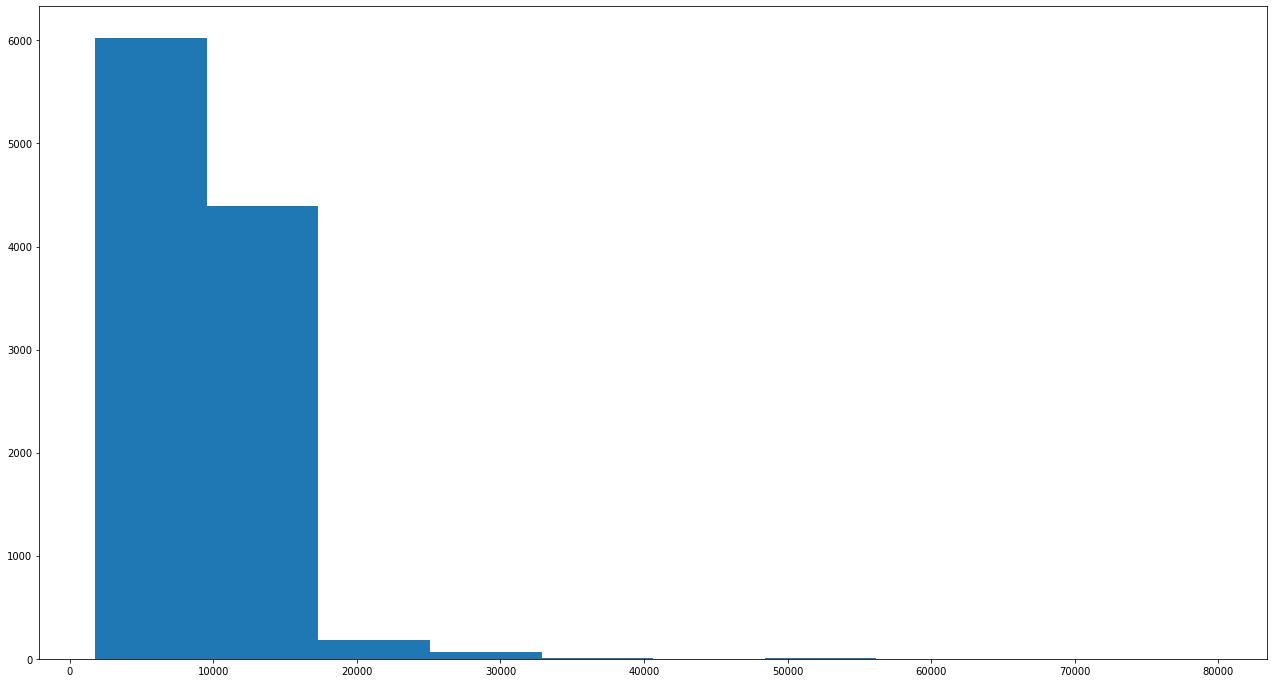

In [18]:
#Histogram graph/ Univariate Analysis
plt.figure(figsize=[22,12])
plt.hist(df_train['Price'])

We can notice here that maximum Flight Tickets are of price between 100 to 10000 is of around 6000 and Flight Tickets having price between 1000 to 1900 is at second maximum .

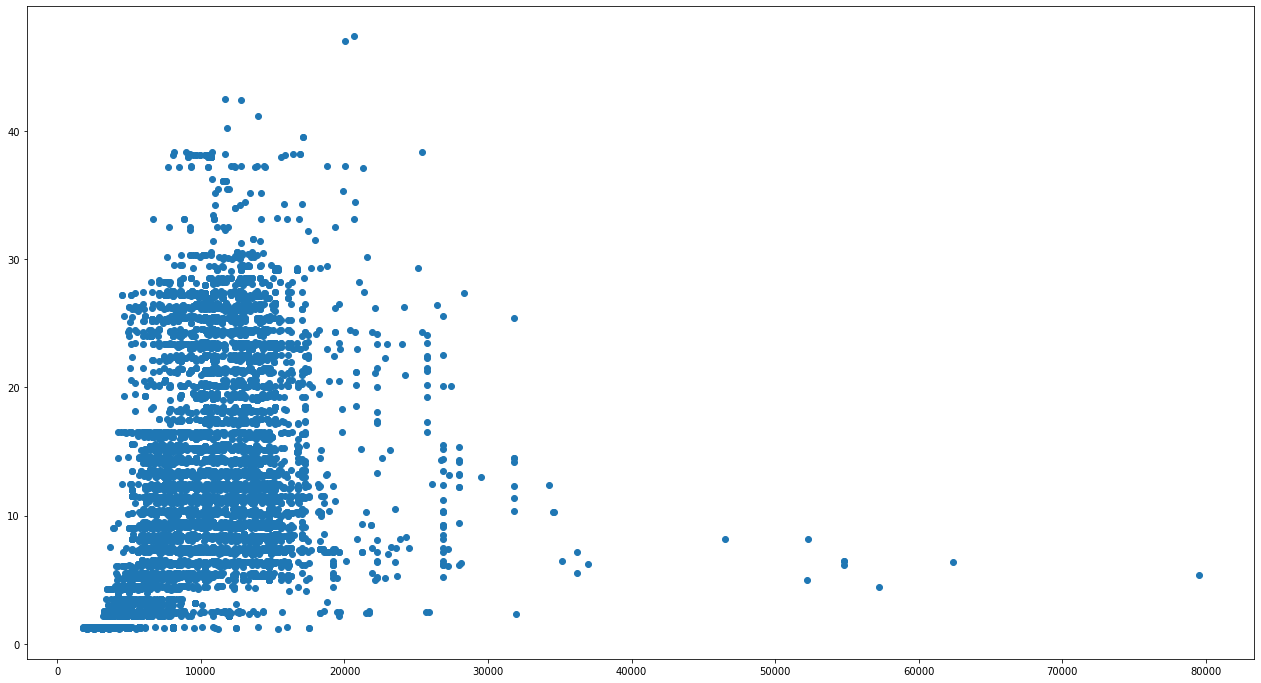

In [19]:
#Scatter Plot / Bivariate Analysis
plt.figure(figsize=[22,12])
plt.scatter(df_train['Price'],df_train['Duration'])

Here we can notice that, maximum number of flights are of price range between 100 (approx) to 1900 (approx) with the duration 5 hours (approx) to 30 hours.

<BarContainer object of 10682 artists>

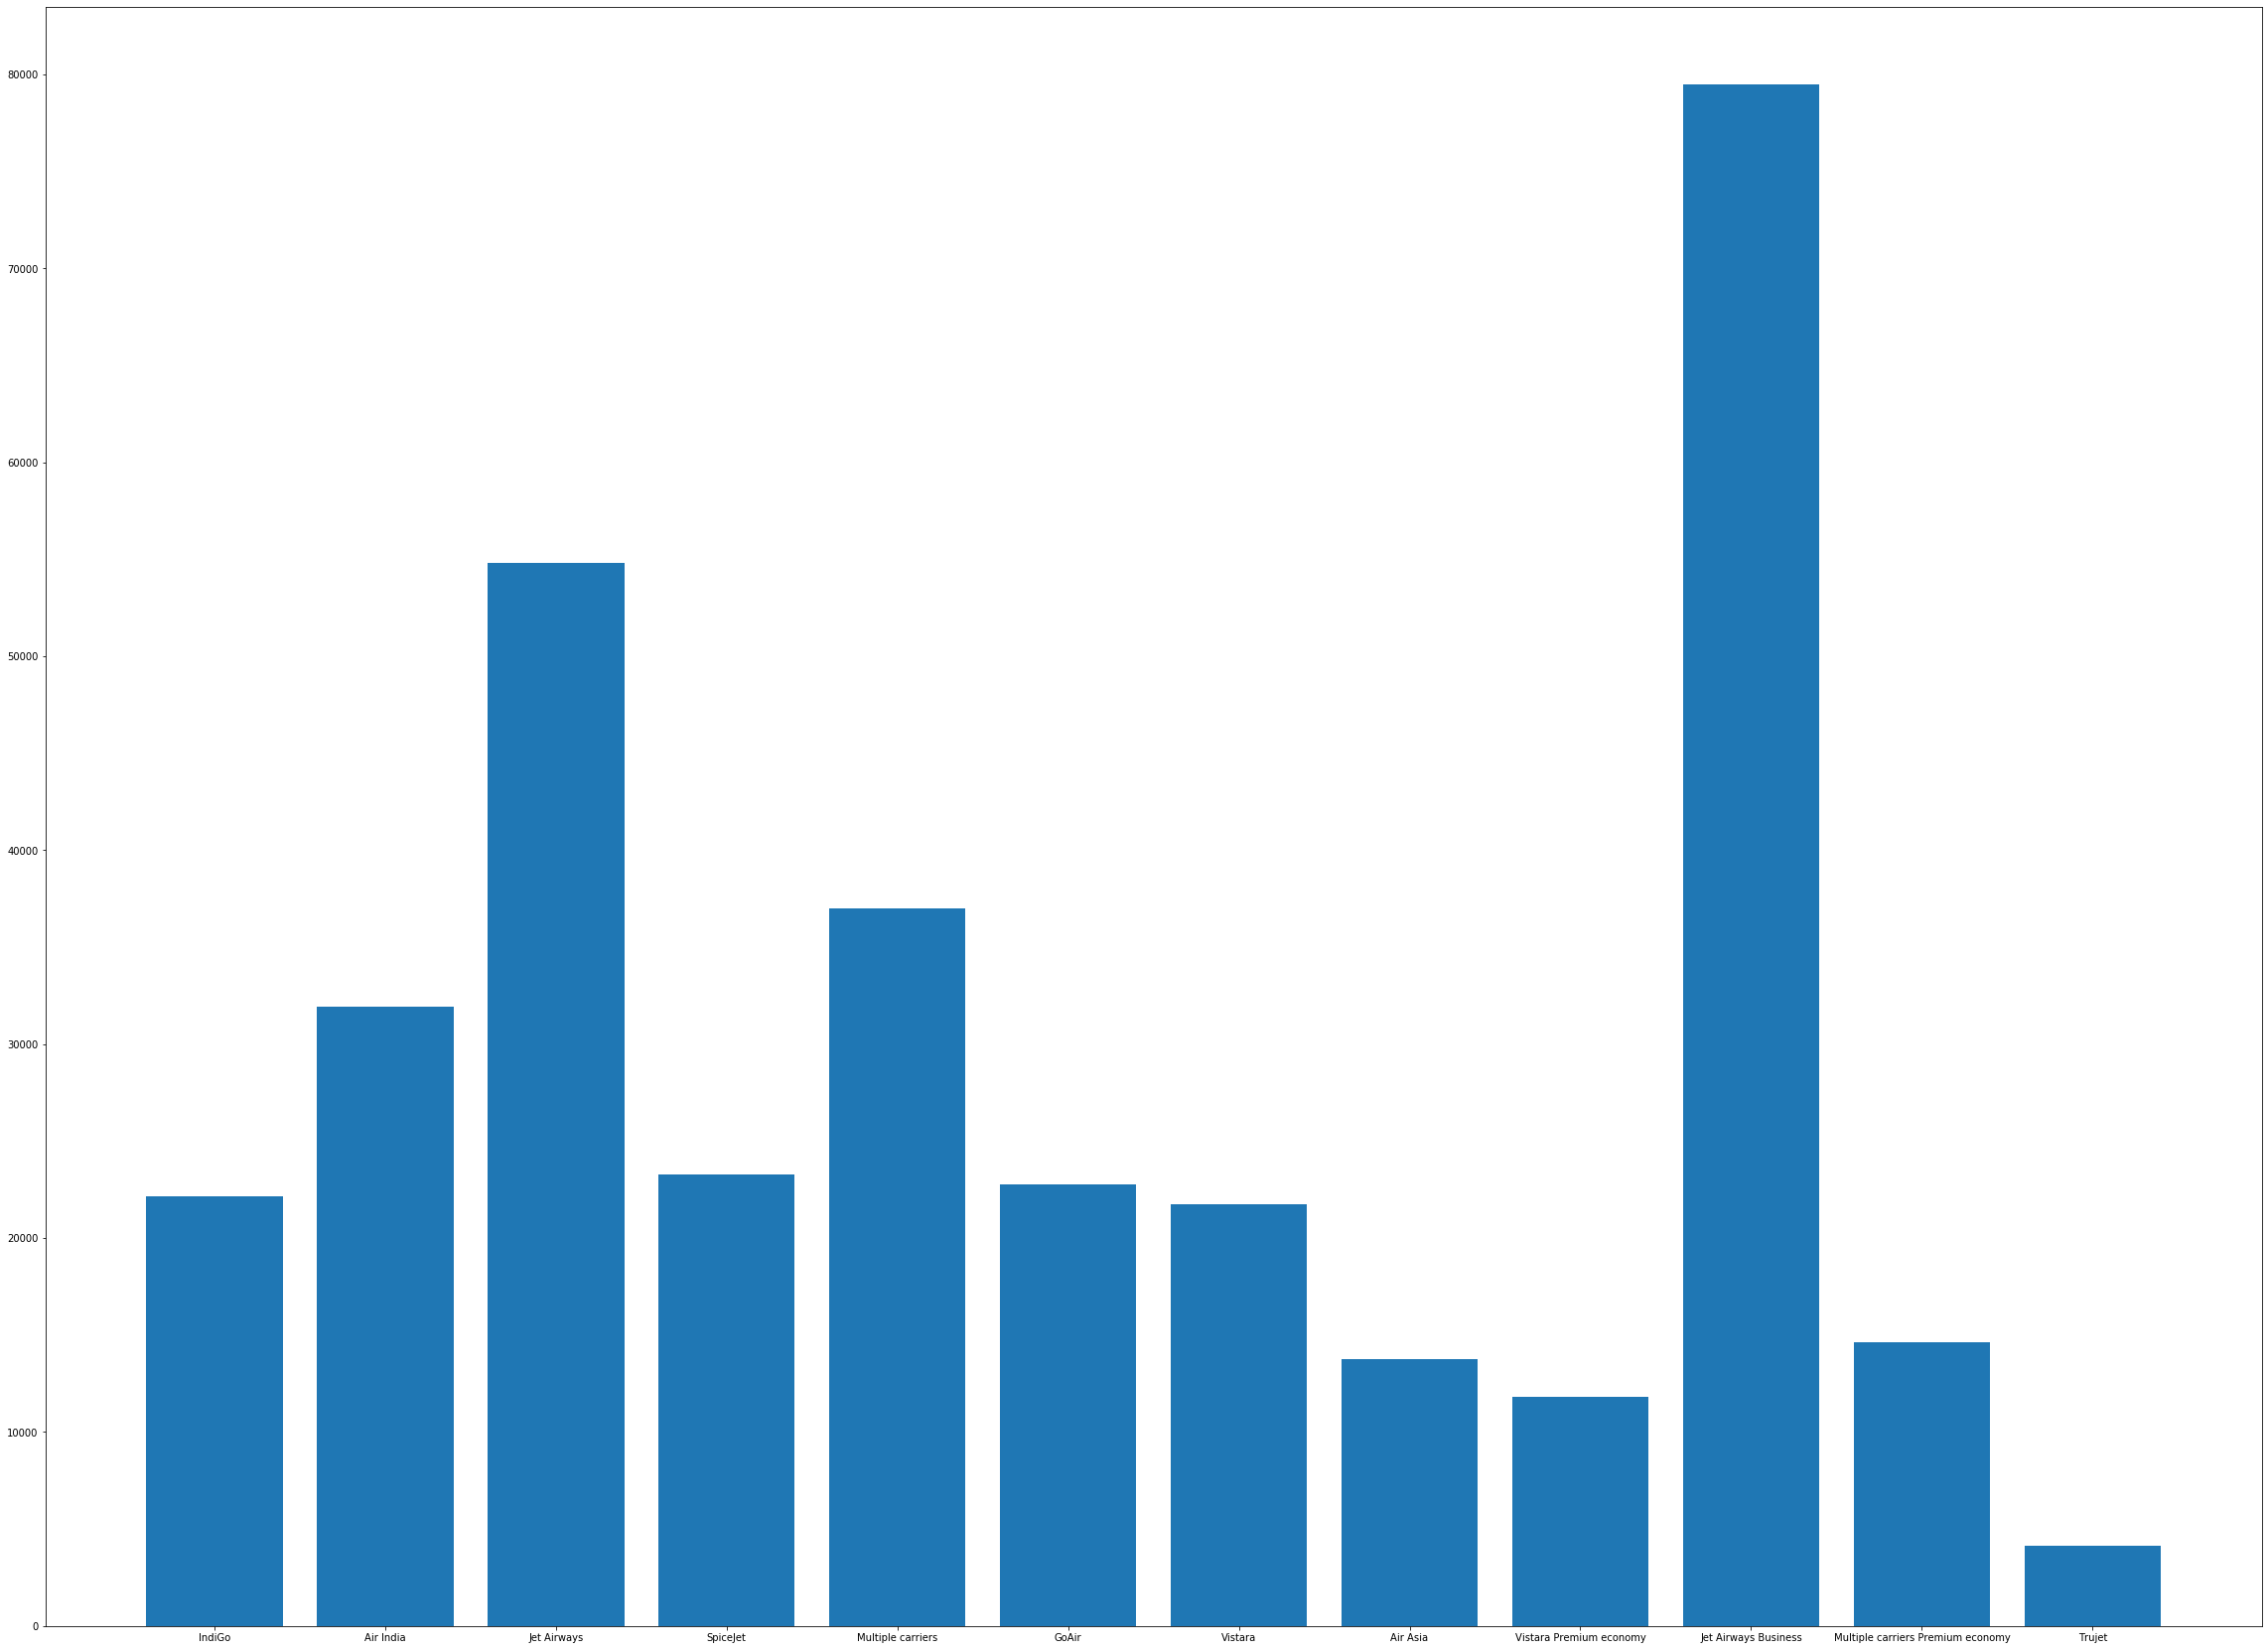

In [20]:
#Bar graph / Bivariate Analysis
plt.figure(figsize=[40,30])
plt.bar(df_train['Airline'],df_train['Price'])

We can analyse the price of different airlines from above graph. Jet Airways Business has maximum ticket price and trujet has the cheapest ticket.

# Label Encoding of train dataset

We noticed before that some columns have object datatype, that needs to change to numeric (either int or float) datatype, so that our model can read the data.

In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Airline']=le.fit_transform(df_train['Airline'])
df_train['Route']=le.fit_transform(df_train['Route'])

In [22]:
#Checking Improved DataFrame
df_train.head()

,Airline,Route,Duration,Total_Stops,Price
0,3,18,2.50,0,3897
1,1,84,7.25,2,7662
2,4,118,19.00,2,13882
3,3,91,5.25,1,6218
4,3,29,4.45,1,13302


We can notice that all string values are converted to numeric values.

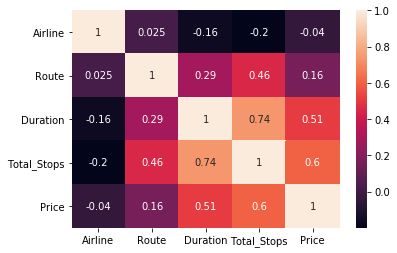

In [23]:
#Checkinh correlation / Multivariate Analysis
corr=df_train.corr()
sns.heatmap(corr,annot=True)

In [24]:
#Checking Statistical information
df_train.describe()

,Airline,Route,Duration,Total_Stops,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,74.820165,10.554873,0.824190,9087.214567
std,2.352090,36.729039,8.483141,0.675229,4611.548810
min,0.000000,0.000000,1.150000,0.000000,1759.000000
25%,3.000000,48.000000,2.500000,0.000000,5277.000000
50%,4.000000,73.000000,8.400000,1.000000,8372.000000
75%,4.000000,104.000000,15.300000,1.000000,12373.000000
max,11.000000,127.000000,47.400000,4.000000,79512.000000


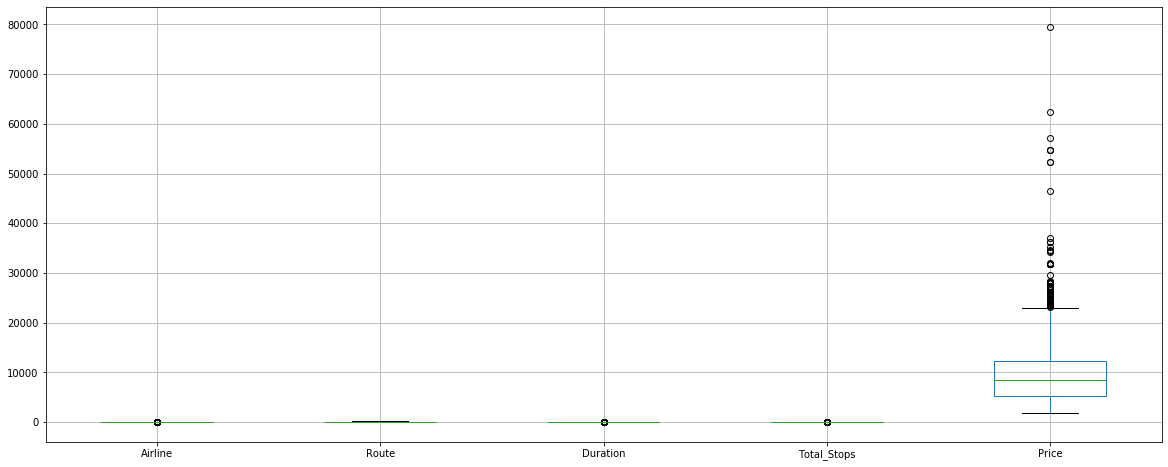

In [25]:
#Checking outliers using boxplots
df_train.boxplot(figsize=[20,8])

Here, there are some outliers that can effect our readings. so, we need to remove these outliers.

In [26]:
#Improving outliers
from scipy import stats
z=np.abs(stats.zscore(df_train))
df_train_new=(z<3).all(axis=1)
df_train=df_train[df_train_new]

In [27]:
#x,y Split
x=df_train.drop('Price',axis=1)
y=df_train['Price']

In [28]:
#Checking skewness
x.skew()

Airline        0.730245
Route         -0.504805
Duration       0.771265
Total_Stops    0.229781
dtype: float64

Some skew values are more than 0.5, so we need to improve skewness.

In [29]:
#improving skewness
from sklearn.preprocessing import power_transform
pt=power_transform(x, method='yeo-johnson')
x=pd.DataFrame(pt,columns=x.columns)
x.skew()

Airline       -0.013733
Route         -0.435186
Duration      -0.018776
Total_Stops   -0.070815
dtype: float64

In [30]:
#Checking test Dataset
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This is our test dataset on which we would do different operations.

In [31]:
#Dropping of unnecessary column
df_test=df_test.drop(['Date_of_Journey','Source','Destination','Dep_Time','Arrival_Time','Additional_Info'],axis=1)

We dropped all unnecessary columns from the dataframe. Let's check the features present in our data.

In [32]:
#Checking Shape of Dataframe
df_test.shape

(2671, 4)

Next, let's look at how many categorical and numerical variables are there in our dataset.

In [33]:
#Checking Datatypes of columns of Dataframe
df_test.dtypes

Airline        object
Route          object
Duration       object
Total_Stops    object
dtype: object

In [34]:
#Checking Nullvalues in the Dataframe
df_test.isnull().sum()

Airline        0
Route          0
Duration       0
Total_Stops    0
dtype: int64

Here there are no null values present in our dataset. Now we will Check total counts of different values in some columns of the dataframe:

In [35]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In our test dataframe we can notice that in column 'Total_Stops' each value has 'stop' at the end, we need to remove this 'stop' from each value and convert the column in numeric (either float or int) datatype. Similarly we need to remove 'h' and 'm' from each values in 'Duration' column and convert it in numeric datatype.

In [36]:
df_test['Total_Stops']=df_test['Total_Stops'].replace('non-stop','0 stop')
df_test['Total_Stops']=df_test['Total_Stops'].str.slice(stop=-5).astype(int)
df_test['Duration']=df_test['Duration'].replace(['h ','m','h'],['.','','.0'],regex=True).astype(float)

In [37]:
df_test.head()

,Airline,Route,Duration,Total_Stops
0,Jet Airways,DEL ? BOM ? COK,10.55,1
1,IndiGo,CCU ? MAA ? BLR,4.00,1
2,Jet Airways,DEL ? BOM ? COK,23.45,1
3,Multiple carriers,DEL ? BOM ? COK,13.00,1
4,Air Asia,BLR ? DEL,2.50,0


In [38]:
df_test.dtypes

Airline         object
Route           object
Duration       float64
Total_Stops      int32
dtype: object

We can notice that column 'Total_Stops' is changed to int datatype and column 'Duration' is changed to float datatype.

# Label Encoding of test dataset

We noticed before that some columns have object datatype, that needs to change to numeric (either int or float) datatype, so that our model can read the data.

In [39]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Airline']=le.fit_transform(df_test['Airline'])
df_test['Route']=le.fit_transform(df_test['Route'])

In [40]:
df_test.head()

,Airline,Route,Duration,Total_Stops
0,4,76,10.55,1
1,3,65,4.00,1
2,4,76,23.45,1
3,6,76,13.00,1
4,0,16,2.50,0


We can notice that all string values are converted to numeric values.

In [41]:
#Checking Statistical information
df_test.describe()

,Airline,Route,Duration,Total_Stops
count,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,54.356421,10.499158,0.833396
std,2.295657,27.128993,8.382846,0.672315
min,0.000000,0.000000,1.150000,0.000000
25%,3.000000,33.000000,2.550000,0.000000
50%,4.000000,51.000000,8.400000,1.000000
75%,6.000000,76.000000,15.200000,1.000000
max,10.000000,99.000000,40.400000,4.000000


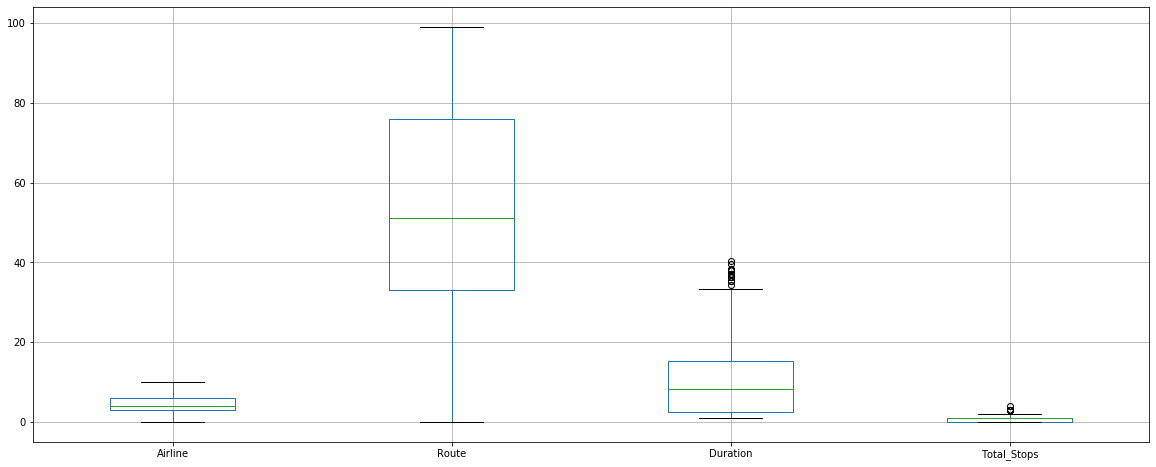

In [42]:
#Checking Outlier using boxplots
df_test.boxplot(figsize=[20,8])

Here, there are some outliers that can effect our readings. so, we need to remove these outliers.

In [43]:
#Improving outlier
from scipy import stats
z=np.abs(stats.zscore(df_test))
df_test_new=(z<3).all(axis=1)
df_test=df_test[df_test_new]

In [44]:
#Checking skewness
df_test.skew()

Airline        0.479149
Route         -0.274971
Duration       0.804893
Total_Stops    0.204759
dtype: float64

Some skew values are more than 0.5, so we need to improve skewness.

In [45]:
#improving skewness
from sklearn.preprocessing import power_transform
pt=power_transform(df_test, method='yeo-johnson')
df_test=pd.DataFrame(pt,columns=df_test.columns)
df_test.skew()

Airline       -0.041774
Route         -0.317535
Duration      -0.024367
Total_Stops   -0.074843
dtype: float64

In [46]:
df_test.to_csv('Flight_Ticket_Price.csv')

Now we will save our improved or cleaned test dataset, so that we can use it in future to predict the required results.

In [47]:
#Importing Libraries required for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [48]:
#Finding the best random state
max_score=0
max_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r2score=r2_score(y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.4970734031160441 random_state is : 0
r2score is : 0.512641788833158 random_state is : 1
r2score is : 0.51707222248776 random_state is : 2
r2score is : 0.5214848617283709 random_state is : 4
r2score is : 0.5264378600950674 random_state is : 5
r2score is : 0.5353374866617864 random_state is : 8
r2score is : 0.5421614998545963 random_state is : 52


Our model gives best accuracy of 54% on random state 52.

# Train Test split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.3)

# ML Alogrithms

In [50]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
r2_score(y_test,predlr)

0.5065161618308567

In [51]:
#KNeighbors Regressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
r2_score(y_test,predknn)

0.6617906457257843

In [52]:
#Random Forest Regressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
r2_score(y_test,predrfr)

0.6721651200974545

In [53]:
#Decision Tree Regressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2_score(y_test,preddtr)

0.6509005435930686

# Cross Validation Score

In [54]:
#Linear Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score is:',scr1.mean())

Cross Validation Score is: 0.5142229710451351


In [55]:
#KNeighbors Regressor
scr2=cross_val_score(knn,x,y,cv=5)
print('Cross Validation Score is:',scr2.mean())

Cross Validation Score is: 0.6593446645543365


In [56]:
#Random Forest Regressor
scr3=cross_val_score(rfr,x,y,cv=5)
print('Cross Validation Score is:',scr3.mean())

Cross Validation Score is: 0.6774594185573679


In [57]:
#Decision Tree Regressor
scr4=cross_val_score(dtr,x,y,cv=5)
print('Cross Validation Score is:',scr4.mean())

Cross Validation Score is: 0.6555640176849545


Difference between Accuracy Score and Cross Validation Score is minimum for KNeighbors Regressor model. So, we proceed with KNeighbors Regressor model only.

# Hyper Tuning Parameter

In [58]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'n_neighbors': [3,5,11,19], 'weights': ['uniform','distance'],'n_jobs':np.arange(2,15)}
gcv= GridSearchCV(knn,parameter,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'n_jobs': 2, 'n_neighbors': 11, 'weights': 'uniform'}

In [59]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(x_test)
r2_score(y_test,predgcv)

0.681677366727554

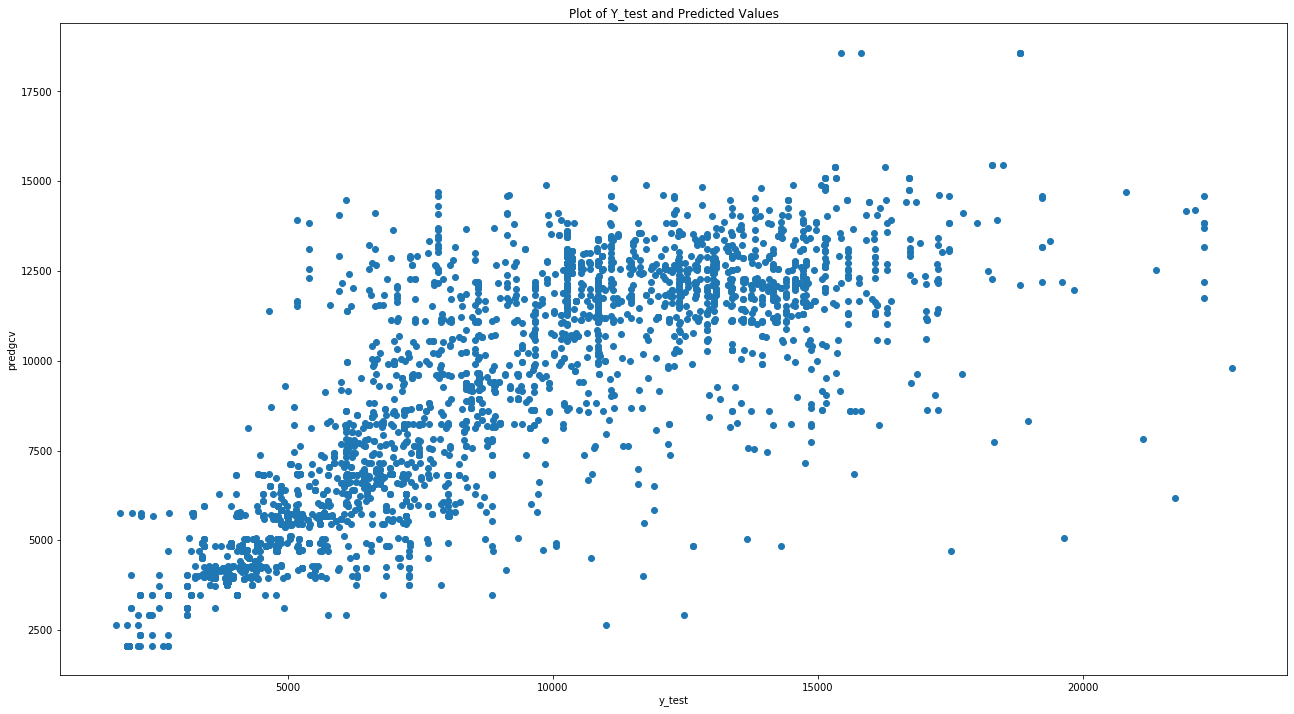

In [60]:
plt.figure(figsize=[22,12])
plt.scatter(y_test,predgcv)
plt.xlabel('y_test')
plt.ylabel('predgcv')
plt.title('Plot of Y_test and Predicted Values')
plt.show()

In [61]:
#Saving Model
import joblib
joblib.dump(gcv.best_estimator_,'Flight_Ticket_Price_Prediction.pk1')

['Flight_Ticket_Price_Prediction.pk1']

In [62]:
mod=joblib.load('Flight_Ticket_Price_Prediction.pk1')

In [63]:
predmod=mod.predict(df_test)
predmod

array([10586.45454545,  4573.        , 12530.18181818, ...,
       13446.63636364,  8344.54545455,  8418.81818182])

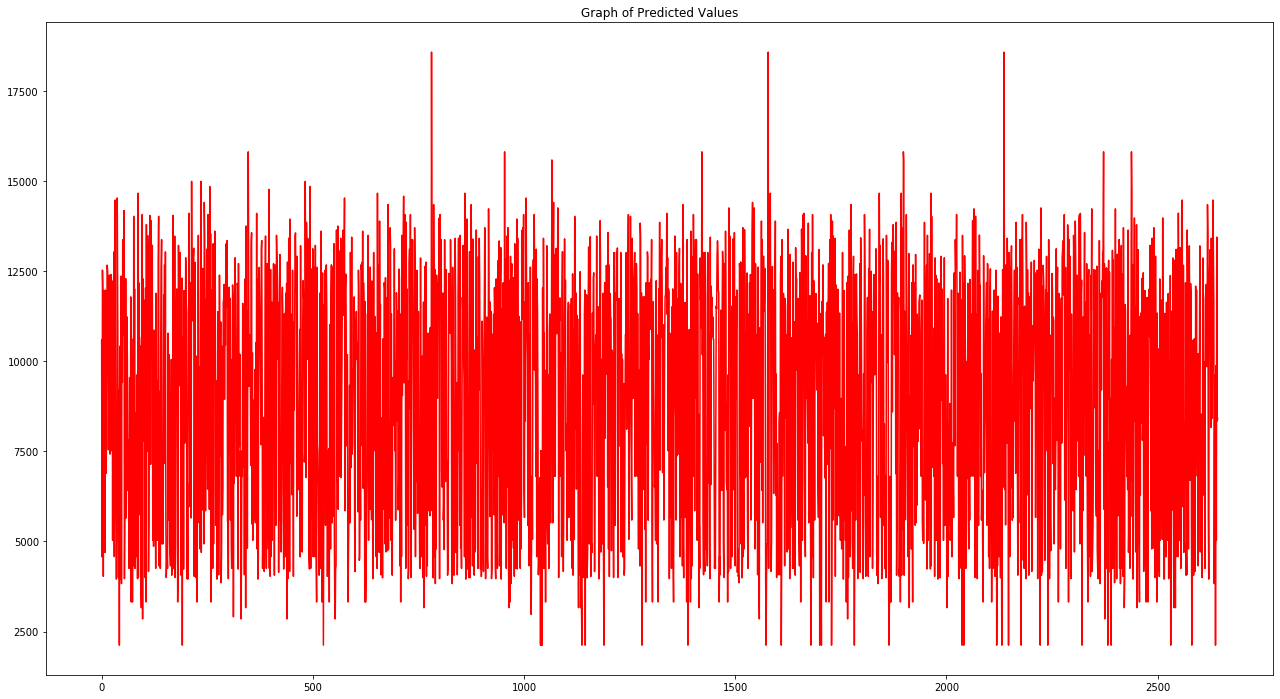

In [64]:
plt.figure(figsize=[22,12])
plt.plot(predmod,color='r')
plt.title('Graph of Predicted Values')
plt.show()

# Conclusion

In this project we have observed that KNeighbors Regressor is the best fit model with R^2 score of 66% which gives R^2 score of 68% with best parameters that are number of iterations: 2, number of neighbors: 11 with uniform weights . We can notice from 'premod' plot that, range for price of Flight Tickets is around 2600 to 15000.  